In [91]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)


In [94]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = 'RELIANCE.NS'
start_date = '2010-01-01'
end_date = '2023-09-24'

# Fetch the data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [95]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,540.427307,540.427307,506.127411,532.700500,481.112976,35372156
2010-01-05,569.551208,569.551208,527.697937,530.323059,478.965729,9872785
2010-01-06,534.879883,542.111328,530.298279,538.891846,486.704681,10933743
2010-01-07,538.891846,552.265076,533.938782,547.832092,494.779266,12090336
2010-01-08,548.797974,551.670715,542.854309,546.395691,493.481873,6973331


In [96]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-15,2468.000000,2468.000000,2449.500000,2457.850098,2457.850098,12734296
2023-09-18,2440.050049,2451.000000,2432.050049,2436.449951,2436.449951,3758150
2023-09-20,2423.050049,2427.600098,2355.000000,2382.149902,2382.149902,28540942
2023-09-21,2374.949951,2390.100098,2360.000000,2364.800049,2364.800049,6113091
2023-09-22,2376.000000,2382.449951,2350.000000,2354.949951,2354.949951,9588393


In [98]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [99]:
df.shape

(3389, 6)

In [100]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [103]:
df.count() 

Open         3389
High         3389
Low          3389
Close        3389
Adj Close    3389
Volume       3389
dtype: int64

In [105]:
df = df.drop_duplicates()
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,540.427307,540.427307,506.127411,532.700500,481.112976,35372156
2010-01-05,569.551208,569.551208,527.697937,530.323059,478.965729,9872785
2010-01-06,534.879883,542.111328,530.298279,538.891846,486.704681,10933743
2010-01-07,538.891846,552.265076,533.938782,547.832092,494.779266,12090336
2010-01-08,548.797974,551.670715,542.854309,546.395691,493.481873,6973331


In [107]:
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [44]:
df = df.reset_index()


In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,540.427307,540.427307,506.127411,532.700500,481.112915,35372156
1,2010-01-05,569.551208,569.551208,527.697937,530.323059,478.965729,9872785
2,2010-01-06,534.879883,542.111328,530.298279,538.891846,486.704681,10933743
3,2010-01-07,538.891846,552.265076,533.938782,547.832092,494.779205,12090336
4,2010-01-08,548.797974,551.670715,542.854309,546.395691,493.481873,6973331


<AxesSubplot: xlabel='Close'>

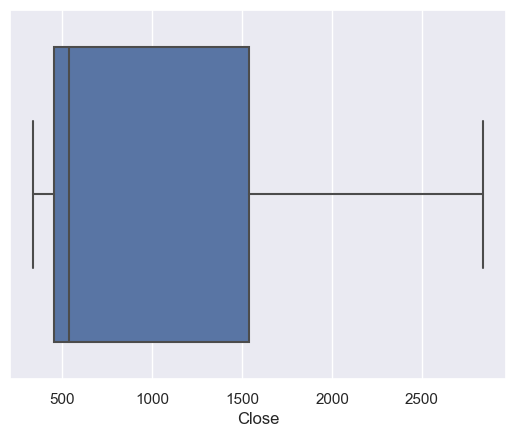

In [111]:
#Detecting Outliers
sns.boxplot(x=df['Close'])

<AxesSubplot: xlabel='Volume'>

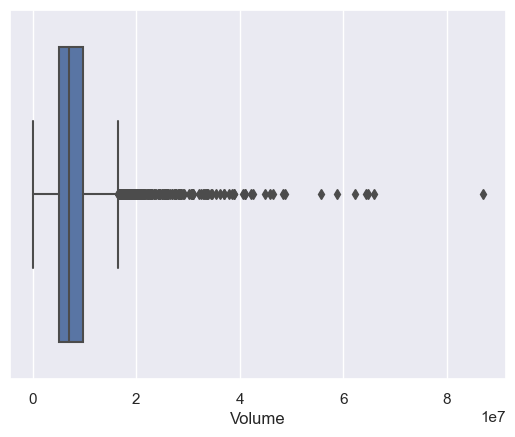

In [112]:
sns.boxplot(x=df['Volume'])

<AxesSubplot: xlabel='Open'>

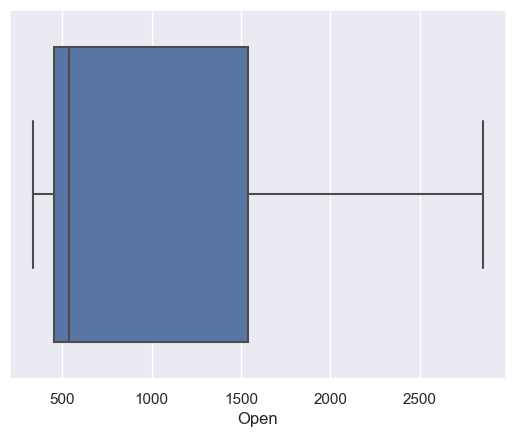

In [113]:
sns.boxplot(x=df['Open'])

In [114]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open         1.086724e+03
High         1.099230e+03
Low          1.078328e+03
Close        1.083257e+03
Adj Close    1.090755e+03
Volume       4.547069e+06
dtype: float64


In [115]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(3175, 6)

Text(0.5, 0, 'Close')

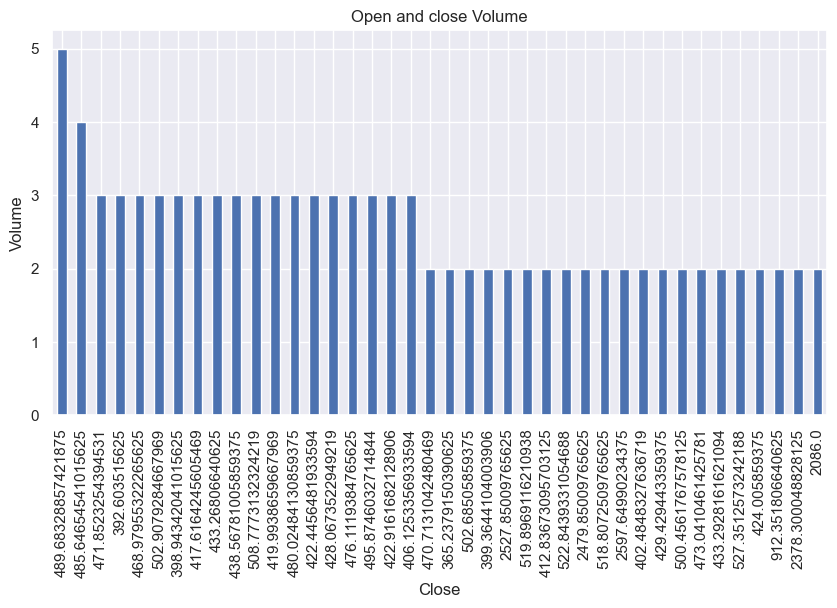

In [117]:
df.Close.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Open and close Volume")
plt.ylabel('Volume')
plt.xlabel('Close')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999897,0.999886,0.999757,0.999709,-0.005365
High,0.999897,1.000000,0.999890,0.999910,0.999852,-0.002137
Low,0.999886,0.999890,1.000000,0.999907,0.999864,-0.008387
Close,0.999757,0.999910,0.999907,1.000000,0.999949,-0.005152
Adj Close,0.999709,0.999852,0.999864,0.999949,1.000000,-0.007287
Volume,-0.005365,-0.002137,-0.008387,-0.005152,-0.007287,1.000000


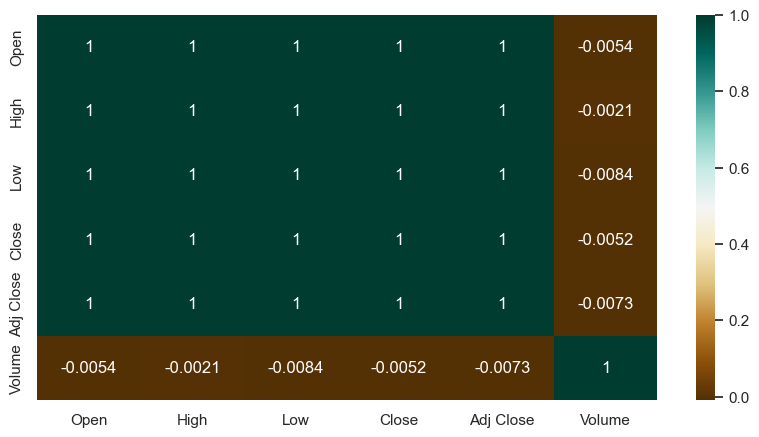

In [118]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

<AxesSubplot: xlabel='Date'>

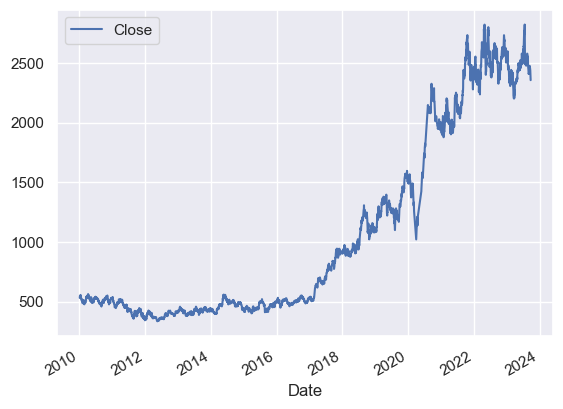

In [121]:
# Visualize Reliance stock prices
df.plot.line(y="Close", use_index=True)